# Classificação do MNIST

Vamos dar início à construção de um modelo capaz de classificar dígitos escritos a mão com mais de 90% de acurácia!!

Relembrando o dataset, a imagem a seguir mostra alguns elementos pertencentes às dez classes do problema (dígitos de 0 a 9) <br>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/440px-MnistExamples.png)

In [11]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

sns.set_style('darkgrid')

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


## Carregamento de dados.

Para focar na implementação e treinamento da rede neural vamos utilizar o carregamento automático de datasets do **```torchvision```**. Vale muito conhecer o carregamento de dados do PyTorch, é bastante eficiente!

Me cobrem de disponibilizar depois um tutorial de como carregar seus próprios dados ;)

In [12]:
train_set = torchvision.datasets.MNIST('.', train=True, 
                                       download=True,
                                       transform=torchvision.transforms.ToTensor())

test_set = torchvision.datasets.MNIST('.', train=True, 
                                      download=False,
                                      transform=torchvision.transforms.ToTensor())

train_loader = DataLoader(train_set,
                          batch_size=32,
                          shuffle=True)

test_loader  = DataLoader(test_set,
                          batch_size=32,
                          shuffle=False)


torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])
torch.Size([32, 1, 28, 28]) torch.Size([32])


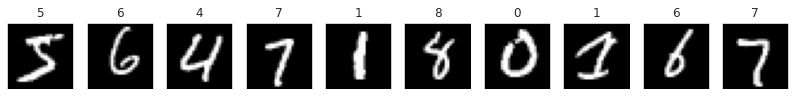

In [13]:
fig, axs = plt.subplots(1,10, figsize=(14, 3))

k = -1
for data, label in test_loader:
  k += 1
  if k > 9: break

  print(data.size(), label.size())
  axs[k].imshow( data[0][0], cmap='gray' )
  axs[k].set(title = str(label[0].item()), xticks=[], yticks=[] )

plt.show()   
  

## Implementando nossa arquitetura!

Defina a arquitetura da sua Rede Neural. O pacote torch.nn que contém as implementações de todas as camadas que serão usadas nessa parte (nn.Linear): 

- https://pytorch.org/docs/stable/nn.html

In [14]:
class MinhaRede(nn.Module):
    
    def __init__(self, input_size, hidden_layers, n_classes):

        super(MinhaRede, self).__init__()

        '''
        Exercício 1.1: Construa a sua rede neural. Ela deve ter entre 2
        e 4 camadas escondidas e ir diminuindo o número de features (hidden size)
        progressivamente ao longo essas camadas. Cada camada intermediária deve
        receber o output da última camada. A primeira camada deve receber
        input_size features e a última camada deve gerar n_classes features que
        farão as predições entre as classes do MNIST. Adicione ativações ReLU
        após todas as camadas nn.Linear, menos na última, que não deve ter
        nenhuma ativação.
        '''
        # ###################################################
        # # Neural Network architecture. 2~4 hidden layers. #
        # ###################################################
        # self.layer1 = # TO DO... Criar primeira camada linear.
        # self.ativ1 = # TO DO... Criar ativação da primeira camada.
        # self.layer2 = # TO DO... Criar segunda camada linear.
        # self.ativ2 = # TO DO... Criar ativação da segunda camada.

        # # TO DO... Criar outras camadas/ativações, se achar necessário
        
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(input_size, hidden_layers[0])
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_layers[0], hidden_layers[1])
        # linear layer (n_hidden -> hidden_3)
        self.fc3 = nn.Linear(hidden_layers[1], hidden_layers[2])
        # linear layer (n_hidden -> 10)
        self.fc4 = nn.Linear(hidden_layers[2], n_classes)


    # Forward function.
    def forward(self, x):

        '''
        Exercício 1.2: Alimente os dados para a camada da sua rede. Para
        alimentar um dado x para uma certa camada self.camada_n:
        saida = self.camada_n(x). 
        Lembre-se de verificar a dimensão do dado de entrada, ela deve estar
        na forma (B, F), no nosso caso (32, 784).
        '''
        # ###################################################
        # # Forwarding through all layers. ##################
        # ###################################################
        # out = # TO DO... Passar o input x sequencialmente pelas camadas da rede.

        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add hidden layer, with relu activation function
        x = F.relu(self.fc3(x))
        # add output layer
        x = self.fc4(x)
        return x
        
        # Returning output.
        # return out # TO DO... Lembre-se de sempre retornar a saída da última camada.
        
# Instancing Network.
input_size = 784 # Input size (number of features).
n_classes = 10 # Number of classes.
hidden_layers = [64, 32, 16]

model = MinhaRede(input_size, hidden_layers, n_classes).to(device) # GPU casting.

# Printing NN.
print(model)

MinhaRede(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=10, bias=True)
)


Teste aqui se a sua rede está criando a saída desejada (B, C)
- B: `batch_size` 
- C: número de classes

In [15]:
k = -1
for data, label in test_loader:
  k += 1
  if k > 2: break

  data = data.to(device)
  print(data.size())
  saida = model(data)
  print(saida.size())

torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


## Definindo um critério de qualidade (Loss)

O primeiro passo é instanciar a função de perda de sua escolha. Trata-se de um problema de classificação com 3 classes, nesse caso a Cross Entropy é a função recomendada, que no PyTorch recebe o nome de ```nn.CrossEntropyLoss()```: https://pytorch.org/docs/stable/nn.html#crossentropyloss 

**Assim como a rede, as entradas e os rótulos, a função de perda também deve ser carregada na GPU**

In [16]:
# Setting classification loss.
'''
Exercício 3: Defina uma loss function. Lembre-se de fazer o casting da loss para
a GPU assim como fizemos na rede.
'''
criterion = nn.CrossEntropyLoss() # TO DO...

## Instanciando o Otimizador

> Pacote ```torch.optim```

Mãos a obra! Vamos agora otimizar a nossa rede usando os algoritmos mais tradicionais da área. Para isso, a biblioteca ```torch.optim``` nos será bem útil, pois ela implementa os principais algoritmos de otimização de redes neurais.

O primeiro passo é instanciar o otimizador. De acordo com o pacote ```optim```, basta chamar o otimizador escolhido, passando como parâmetro:
* Os parâmetros da rede que será otimizada (```params = model.parameters()```)
* A taxa de aprendizado (```lr```)
* A regularização (```weight_decay```)

A depender do otimizador, pode ser necessário alimentar outros parâmetros, mas esses quase sempre são obrigatórios!

O $Pytorch$ tem várias opções de otimizadores, desde os mais simples como o SGD até adaptadores mais modernos com velocidades de aprendizado adaptáveis para cada parâmetro da rede (i.e. Adam, Adagrad, RSMProp...). Todos os otimizadores estão localizados no pacote torch.optim. 

Para mais informnações sobre o pacote, visite: <https://pytorch.org/docs/stable/optim.html>.

In [17]:
import torch.optim as optim

lr = 0.0001 # TO DO se quiser, altere a learning rate
regularizer = 0.00005 # L2 Normalization via weight decay.

'''
Exercício 2: Defina um otimizador. Utilize um otimizador mais poderoso 
como o Adam. Se quiser, experimente diferentes learning rates para o 
otimizador e observe como isso afeta a otimização da loss.
'''
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=regularizer) ## TO DO defina um otimizador

# Fluxo de Treinamento & Validação

## Treinamento

Passo a passo do fluxo de treinamento (uma época):
* Iterar nos batches
* Cast dos dados no dispositivo de hardware
* Forward na rede e cálculo da loss
* Zerar o gradiente do otimizador
* Calcular o gradiente da variável loss
* Atualizar dos pesos do modelo com o otimizador

Esse conjunto de passos é responsável pelo processo iterativo de otimização de uma rede. **A validação** por outro lado, é apenas a aplicação da rede em dados nunca antes visto para estimar a qualidade do modelo no mundo real.


In [18]:
'''
Exercício 4: Complete o código da função a seguir para que ela implemente 
um fluxo de treinamento (descrição acima).
'''

def train(train_loader, net, epoch):

    # Modo de treinamento
    net.train()
    
    start = time.time()
    
    epoch_loss  = []

    # Para cálculo da acurácia
    pred_list, label_list = [], []

    ## Iterando nos batches
    for batch in train_loader:
    
      dado, rotulo = batch
    
      ## TO DO: Coloque os dados na GPU (variável device)
      dado = dado.to(device)
      rotulo = rotulo.to(device)

      ## TO DO: realize o forward dos dados na rede
      ypred = net(dado)

      ## TO DO: calcule a loss e dê append na lista epoch_loss 
      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

      ## TO DO: zerar o gradiente
      optimizer.zero_grad()
      
      ## TO DO: calcule o gradiente da loss
      loss.backward()

      ## TO DO: Dê um passo de otimização
      optimizer.step()

      '''
      Exercício 6: Quando terminar tudo e perceber que a sua loss está
      reduzindo ao longo do treinamento, descomente todas as linhas a seguir
      substituindo ypred por sua variável resposta do modelo e acompanhe 
      a acurácia da sua proposta de rede neural.
      Faça isso também na função validate().
      '''
      _, pred = torch.max(ypred, dim=1)
      pred_list.append(pred.cpu().numpy())
      label_list.append(rotulo.cpu().numpy())

    epoch_loss = np.asarray(epoch_loss)


    acc = metrics.accuracy_score(np.asarray(label_list).ravel(),
                                   np.asarray(pred_list).ravel())
      
    end = time.time()
    print('#################### Train ####################')
    print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
    print('------- Acc: %.2f'%(acc*100))
      
    return epoch_loss.mean()

## Validação

Passo a passo do fluxo de validação (uma época):
* Iterar nos batches
* Cast dos dados no dispositivo de hardware
* Forward na rede e cálculo da loss
* ~~Zerar o gradiente do otimizador~~
* ~~Calcular o gradiente da variável loss~~
* ~~Atualizar dos pesos do modelo com o otimizador~~

Para essa etapa, o PyTorch oferece dois artifícios:
* ```model.eval()```: Impacta no *forward* da rede, informando as camadas caso seu comportamento mude entre fluxos (ex: dropout).
* ```with torch.no_grad()```: Gerenciador de contexto que desabilita o cálculo e armazenamento de gradientes (economia de tempo e memória). Todo o código de validação deve ser executado dentro desse contexto.

Exemplo de código para validação

```python
net.eval()
with torch.no_grad():
  for batch in test_loader:
      # Código de validação
```

Existe o equivalente ao ```model.eval()``` para explicitar que a sua rede deve estar em modo de treino, é o ```model.train()```. Apesar de ser o padrão dos modelos, é boa prática definir também o modo de treinamento.

In [19]:
'''
Exercício 5: Complete o código da função a seguir para que ela implemente 
um fluxo de validação (descrição acima).
'''

def validate(test_loader, net, epoch):

  # Modo de teste
  net.eval()
  
  start = time.time()
  
  epoch_loss  = []

  # Para cálculo da acurácia
  pred_list, label_list = [], []
  
  with torch.no_grad(): 
     ## Iterando nos batches
    for batch in test_loader:

      dado, rotulo = batch

      ## TO DO: Coloque os dados na GPU (variável device)
      dado = dado.to(device)
      rotulo = rotulo.to(device)   

      ## TO DO: realize o forward dos dados na rede
      ypred = net(dado)

      ## TO DO: calcule a loss e dê append na lista epoch_loss 

      loss = criterion(ypred, rotulo)
      epoch_loss.append(loss.cpu().data)

      _, pred = torch.max(ypred, dim=1)
      pred_list.append(pred.cpu().numpy())
      label_list.append(rotulo.cpu().numpy())

  epoch_loss = np.asarray(epoch_loss)

  acc = metrics.accuracy_score(np.asarray(label_list).ravel(),
                                 np.asarray(pred_list).ravel())
  
  end = time.time()
  print('********** Validate **********')
  print('Epoch %d, Loss: %.4f +/- %.4f, Time: %.2f' % (epoch, epoch_loss.mean(), epoch_loss.std(), end-start))
  print('------- Acc: %.2f\n'%(acc*100))
  
  return epoch_loss.mean()
    

In [20]:
train_losses, test_losses = [], []
num_epochs = 20
for epoch in range(num_epochs):
  
  # Train
  train_losses.append(train(train_loader, model, epoch))
  
  # Validate
  test_losses.append(validate(test_loader, model, epoch))

#################### Train ####################
Epoch 0, Loss: 1.0287 +/- 0.6092, Time: 8.99
------- Acc: 70.71
********** Validate **********
Epoch 0, Loss: 0.4761 +/- 0.1675, Time: 5.08
------- Acc: 86.87

#################### Train ####################
Epoch 1, Loss: 0.4137 +/- 0.1518, Time: 8.44
------- Acc: 88.41
********** Validate **********
Epoch 1, Loss: 0.3666 +/- 0.1736, Time: 4.94
------- Acc: 89.53

#################### Train ####################
Epoch 2, Loss: 0.3432 +/- 0.1508, Time: 8.99
------- Acc: 90.25
********** Validate **********
Epoch 2, Loss: 0.3202 +/- 0.1714, Time: 5.22
------- Acc: 90.89

#################### Train ####################
Epoch 3, Loss: 0.3063 +/- 0.1452, Time: 9.14
------- Acc: 91.30
********** Validate **********
Epoch 3, Loss: 0.2879 +/- 0.1634, Time: 5.27
------- Acc: 91.74

#################### Train ####################
Epoch 4, Loss: 0.2804 +/- 0.1383, Time: 8.63
------- Acc: 91.93
********** Validate **********
Epoch 4, Loss: 0.2675 +/-